# EcoFOCIpy ADCP QC - 19BSP-12A

- mostly remove >100 cm/s flows in u/v


In [1]:
import xarray as xa
import numpy as np

import matplotlib.pyplot as plt


In [2]:
xdf = xa.load_dataset('19bsp12a_velein_0098m.nc')

In [3]:
xdf =xdf.where(xdf.u_curr_comp <=100,np.nan)
xdf

<xarray.Dataset>
Dimensions:          (latitude: 1, longitude: 1, time: 11062, depth: 26)
Coordinates:
  * time             (time) datetime64[ns] 2019-07-20 ... 2020-10-22T21:00:00
  * depth            (depth) float64 -8.0 -4.0 -0.0 4.0 ... 80.0 84.0 88.0 92.0
  * latitude         (latitude) float64 61.85
  * longitude        (longitude) float64 -176.3
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 nan nan ... nan
    v_curr_comp      (latitude, longitude, time, depth) float64 nan nan ... nan
    w_curr_comp      (latitude, longitude, time, depth) float64 nan nan ... nan
    w_curr_comp_err  (latitude, longitude, time, depth) float64 nan nan ... nan
    agc1             (latitude, longitude, time, depth) float64 nan nan ... nan
    agc2             (latitude, longitude, time, depth) float64 nan nan ... nan
    agc3             (latitude, longitude, time, depth) float64 nan nan ... nan
    agc4             (latitude, longitude, time, depth) float64 nan nan ... nan
Attributes:
    Latitude_DegMMddW:                      61 51.047 N
    Longitude_DegMMddN:                     176 15.03 W
    MooringID:                              19BSP-12A
    platform_deployment_date:               2019-07-25T20:41:00Z
    platform_deployment_cruise_name:        
    platform_recovery_date:                 2020-09-06T00:00:00Z
    platform_recovery_cruise_name:          DY2012
    platform_deployment_recovery_comments:  Deployed Location assumed same as...
    WaterDepth:                             100.0
    date_created:                           2022-12-14T11:50:55Z
    date_modified:                          
    QC_indicator:                           unknown

In [4]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

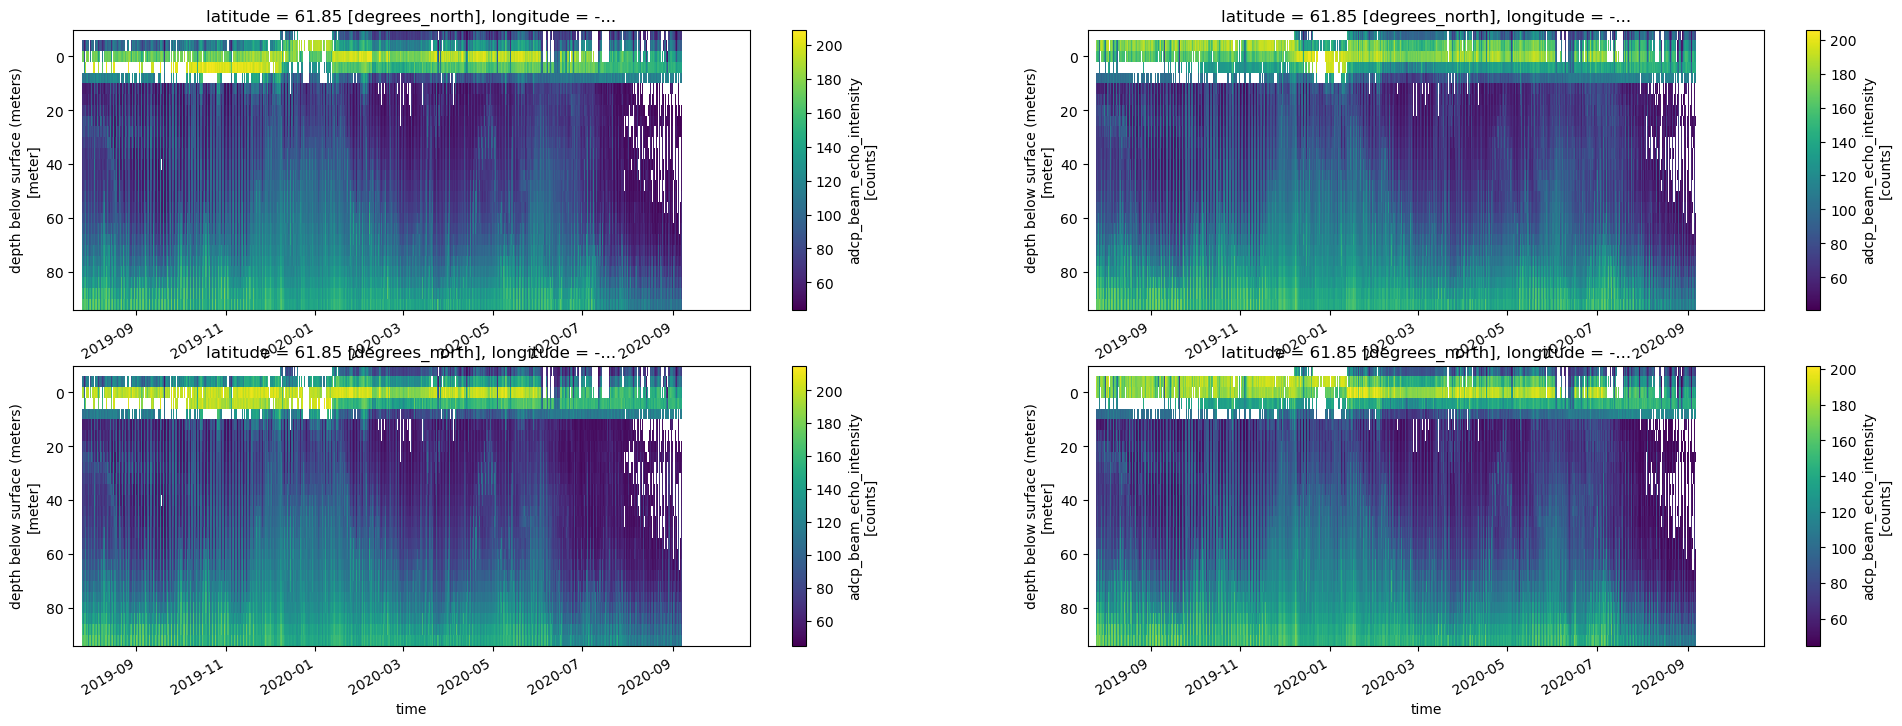

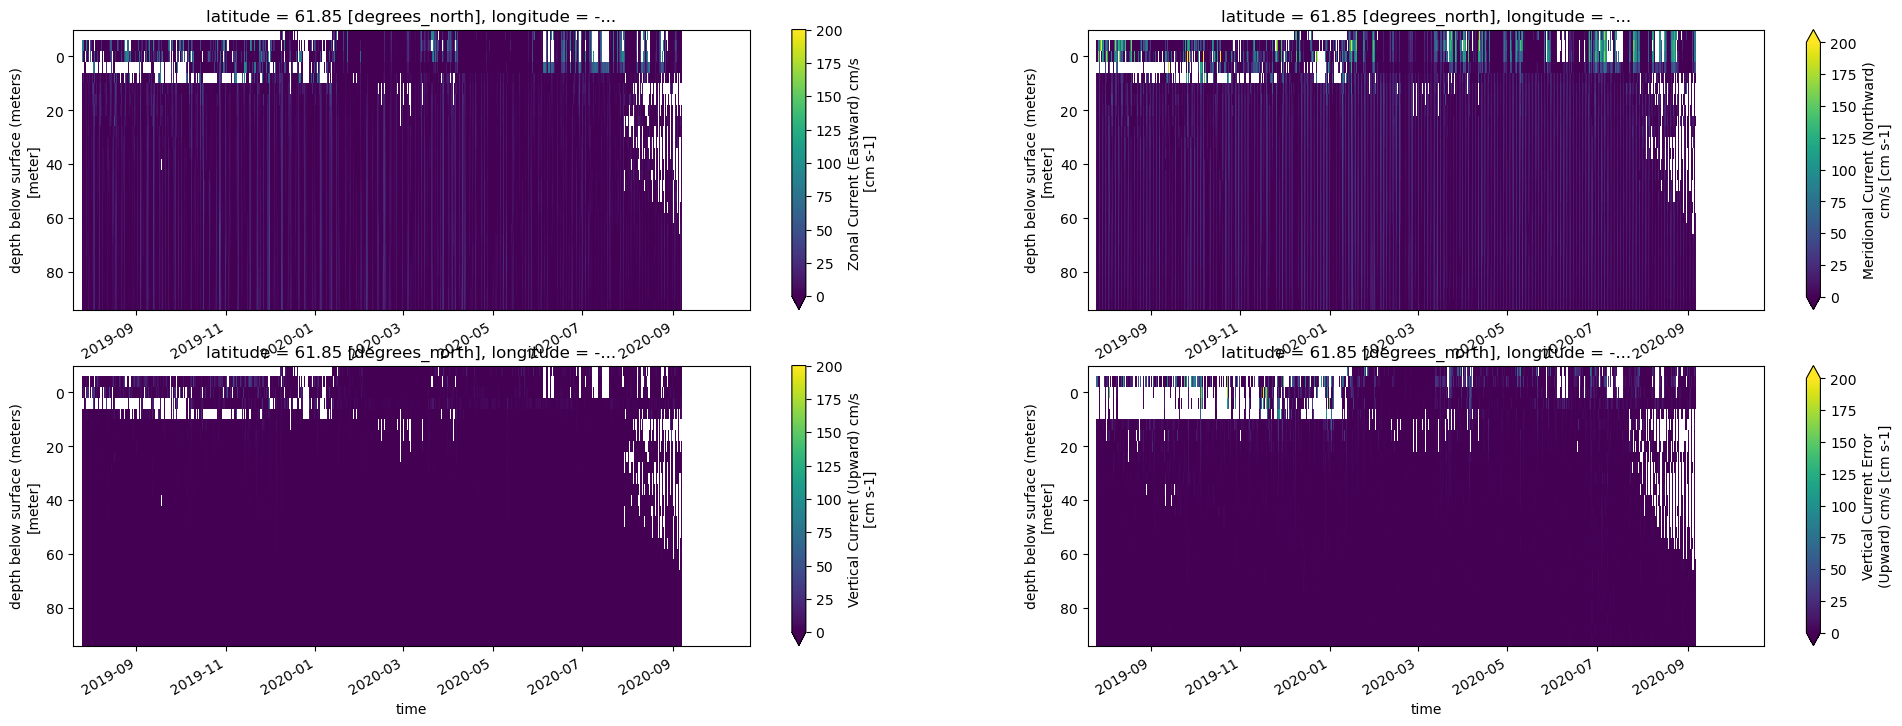

In [5]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [6]:
try:
    xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >100cm/s'
except:
    xdf.attrs['history'] = 'removed U,V >100cm/s'
    

## Trim above surface (negative values)

In [7]:
ixdf = xdf.where(xdf.depth >=-0.).dropna(how='all',dim='depth')

In [8]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  trimmed above surface'

In [9]:
ixdf.to_netcdf('19bsp12a_velein_0098m.trimmed.nc')

In [10]:
xdf = xa.load_dataset('19bsp12a_velein_0098m.trimmed.nc')

In [11]:
ixdf = xdf.interpolate_na(dim='time',max_gap='2H')

In [12]:
ixdf.attrs['history'] = ixdf.attrs['history']+'  linearly interpolated 1hour gaps'

## Interpolate over singleton missing gaps linearly

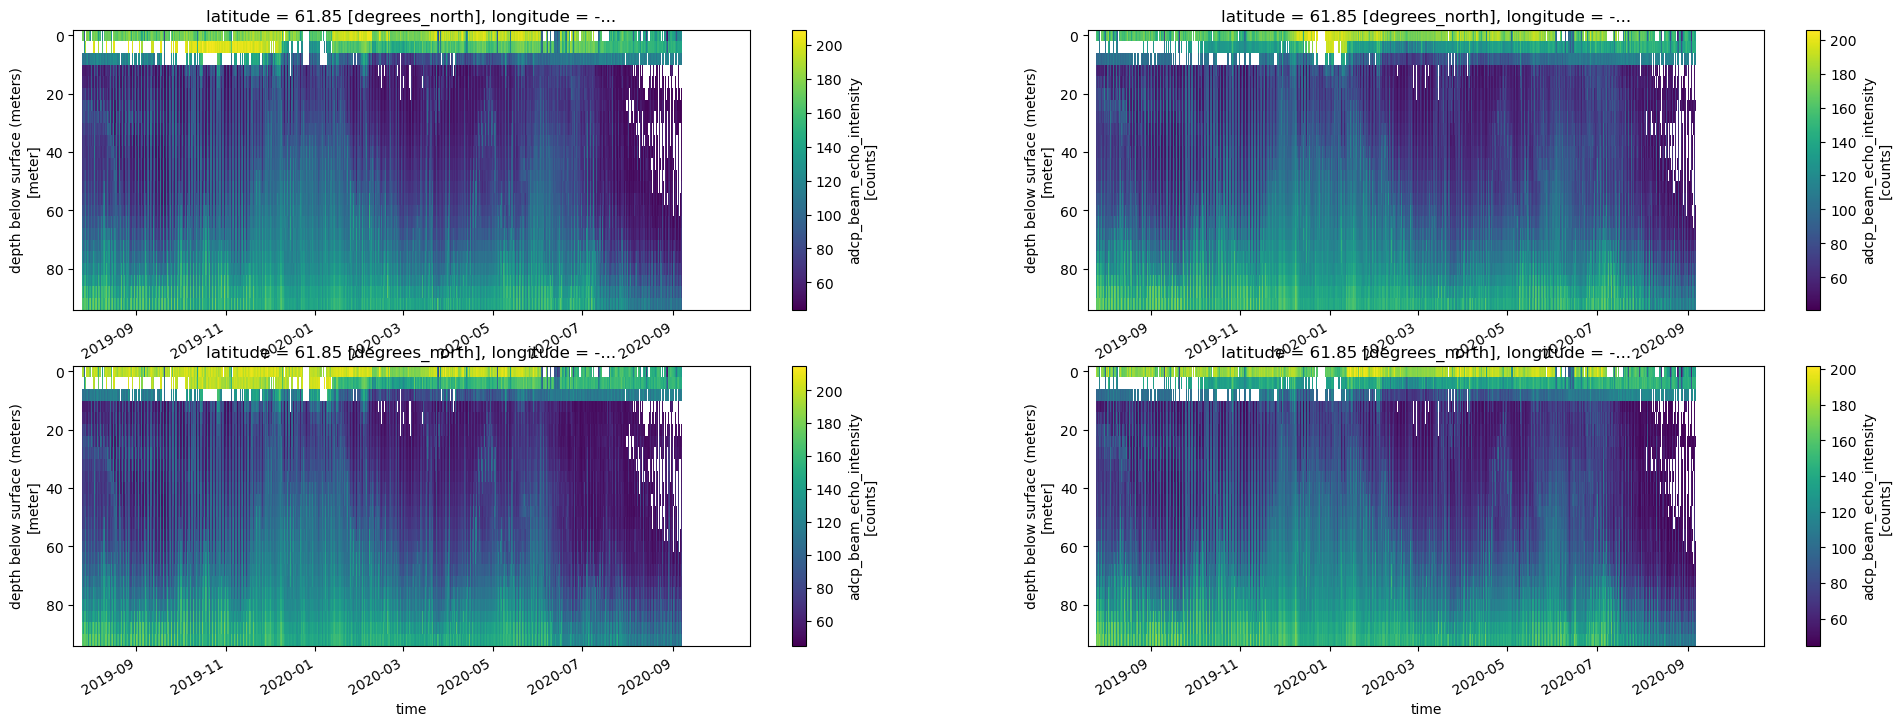

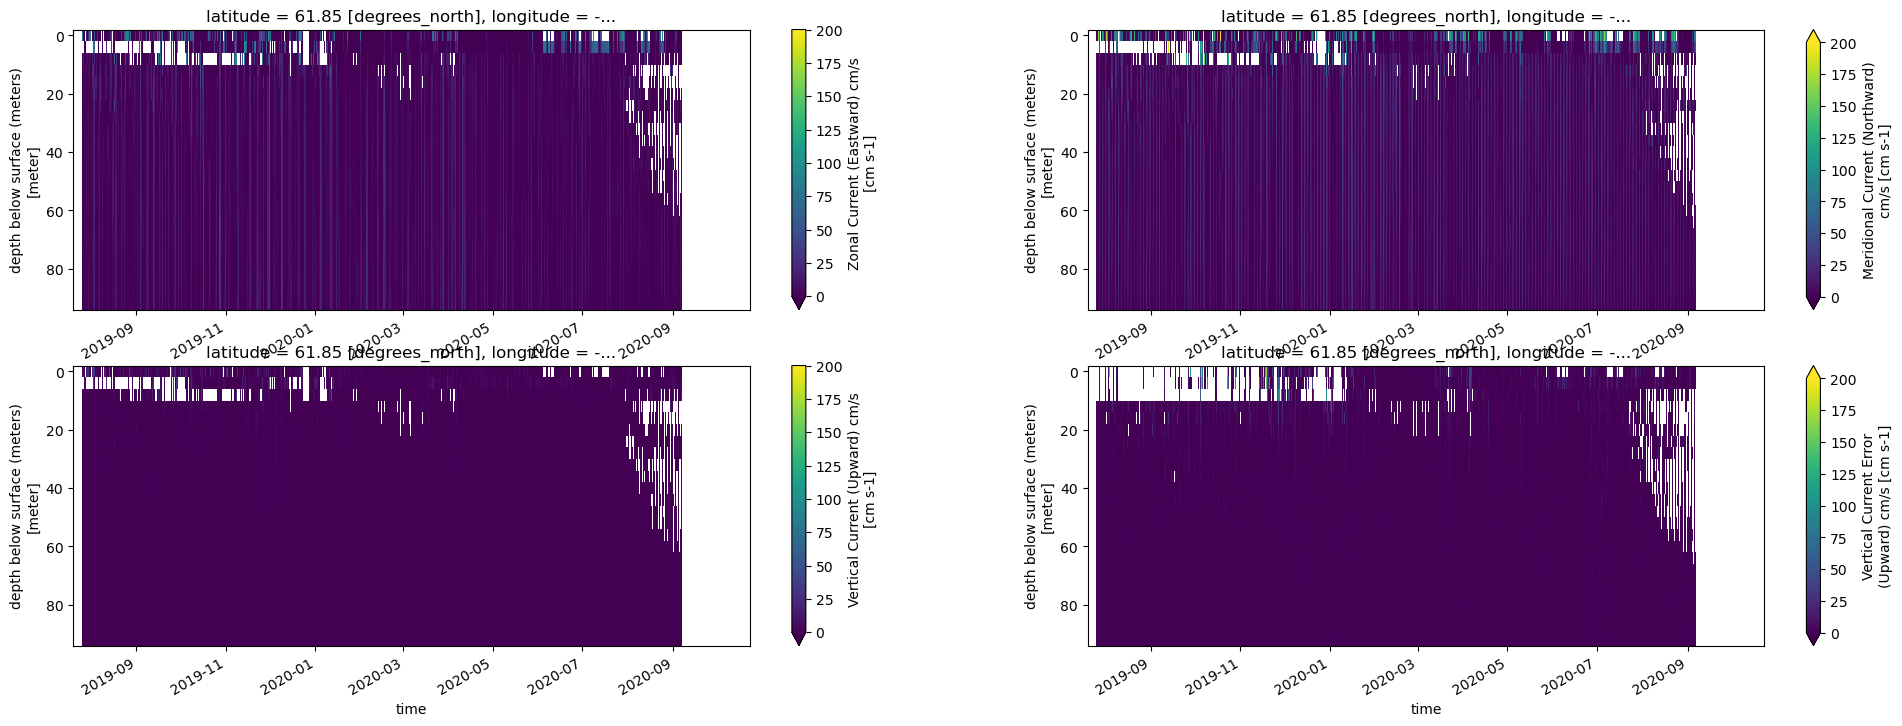

In [13]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [14]:
ixdf.to_netcdf('19bsp12a_velein_0098m.filtered.nc')

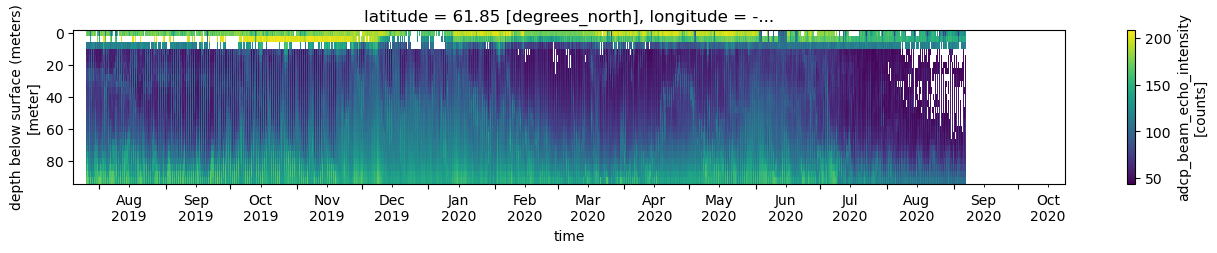

In [15]:
%matplotlib inline
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker


fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,2))
ixdf['agc1'].T.plot(ax=ax, yincrease=False)

# xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_formatter(DateFormatter('%b\n%Y'))
ax.xaxis.set_major_formatter(DateFormatter(''))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)

## Plot each depth

In [16]:
import EcoFOCIpy.plots.TimeSeriesStickPlot as TimeseriesStickPlot
import EcoFOCIpy.math.lanzcos as lanzcos 

import pandas as pd

In [17]:
# ixdf = ixdf.dropna(dim='time')

In [18]:
dataset_id = '19bsp12a_'

In [19]:
plotfigs = False
verbose = False
savedata = False
domath = False

for dd in range(ixdf.depth.size-1,-1,-1):
    udata, vdata = None,None
    depth_curr = ixdf.isel(depth=dd)
    if verbose:
        print(f'depth: {depth_curr}, {dd}')
    ### filter
    try:
        udata = depth_curr.u_curr_comp[0,0,:].to_pandas()
        vdata = depth_curr.v_curr_comp[0,0,:].to_pandas()
    except:
        udata = depth_curr.ucomp_current[:,0,0].to_pandas()
        vdata = depth_curr.vcomp_current[:,0,0].to_pandas()
        
    data = pd.concat([udata, vdata], axis=1)
    data.columns = ['udata','vdata']


    #plot
    if plotfigs:
        try:
            p1 = TimeseriesStickPlot.Timeseries1dStickPlot()
            plt1, fig1 = p1.plot(timedata=data.index, 
                                 udata=data.udata.values, 
                                 vdata=data.vdata.values,
                                 rotate=0)
            # plt1.xlabel(dataset_id+str(int(ixdf.depth[dd].values)).zfill(2)+'_f35')
            plt1.xlabel(dataset_id+str(int(ixdf.depth[dd].values)).zfill(2))
            # fig1.savefig(dataset_id+str(int(ixdf.depth[dd].values)).zfill(2)+'_f35'+'.png',dpi=600)
            fig1.savefig(dataset_id+str(int(ixdf.depth[dd].values)).zfill(2)+'.png',dpi=600)

            if verbose:
                #subsample
                datasub=data.resample('D').median()
                p1 = TimeseriesStickPlot.Timeseries1dStickPlot()
                plt1, fig1 = p1.plot(timedata=datasub.index, 
                                     udata=datasub.ufdata.values, 
                                     vdata=datasub.vfdata.values,
                                     linescale=10,
                                     rotate=0)
                plt1.xlabel(dataset_id+str(int(ixdf.depth[dd].values)).zfill(2)+'_f35_daily')
                fig1.savefig(dataset_id+str(int(ixdf.depth[dd].values)).zfill(2)+'_f35_daily'+'.png',dpi=600)

                p1 = TimeseriesStickPlot.Timeseries1dStickPlot()
                plt1, fig1 = p1.plot(timedata=data.index, 
                                     udata=data.udata.values, 
                                     vdata=data.vdata.values,
                                     rotate=0)
                plt1.xlabel(dataset_id+str(int(ixdf.depth[dd].values)).zfill(2)+'_nofilter')
                fig1.savefig(dataset_id+str(int(ixdf.depth[dd].values)).zfill(2)+'_nofilter'+'.png',dpi=600)
        except:
            pass
    #save data
    if savedata:
        data[['ufdata','vfdata']].to_csv(dataset_id+'_'+str(int(ixdf.depth[dd].values)).zfill(2)+'_f35'+'.csv')

## Remove data from nn-bins if upper bins appear bad for currents

Remove top two bins to get to first good bin

In [20]:
trim_to_good = True

if trim_to_good:
    ixdf = ixdf.where(ixdf.depth >=-0.).dropna(how='all',dim='depth')

    nbins = 2
    ixdf = ixdf.isel(depth=slice(nbins,-1))

    ixdf.attrs['history'] = ixdf.attrs['history']+f'  trimmed top {nbins} of air contaminated data'

    ixdf.to_netcdf('19bsp12a_velein_0098m.trimmed.good.nc')

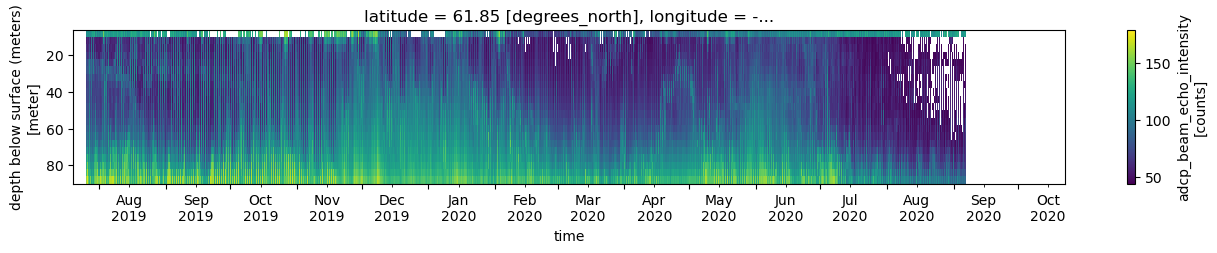

In [21]:
%matplotlib inline
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker


fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,2))
ixdf['agc1'].T.plot(ax=ax, yincrease=False)

# xfmt = mdates.DateFormatter('%d-%b')
ax.xaxis.set_major_locator(DayLocator(bymonthday=1))
ax.xaxis.set_minor_locator(DayLocator(bymonthday=15))
ax.xaxis.set_minor_formatter(DateFormatter('%b\n%Y'))
ax.xaxis.set_major_formatter(DateFormatter(''))
ax.xaxis.set_tick_params(which='major', pad=3)
ax.xaxis.set_tick_params(which='minor', pad=5)